In [1]:
import pandas as pd
import numpy as np
import data_tools as dt
import sqlite3
import networkx as nx
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from datetime import datetime,date

import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans,DBSCAN


# pd.set_option('display.float_format', lambda x: '%.5f' % x) # format reset.
np.random.seed(42)

In [3]:
def vis(df):
    vis = KElbowVisualizer(
        KMeans().fit(df),
        k= (2,51) # rainge of clusters...
    )
    vis.fit(df)
    return vis.elbow_value_

In [6]:
# connect = sqlite3.connect('reddit_data.db')

# subreddit_data = pd.read_sql_query(
    
#     """SELECT *
#     FROM subreddit
#     """
#     ,
#     con = connect
# )

In [7]:
# subreddit_data.to_csv('subreddit_data.csv')

In [8]:
reddit_data = pd.read_csv('unclean_subreddit')
reddata = pd.read_csv('redit_data_clean.csv')
subreddit_data= pd.read_csv('subreddit_data.csv')

In [9]:
subreddit_data.head()

,subreddit_id,subreddit
0,0,007
1,1,065_082_071
2,2,0ad
3,3,0x10c
4,4,0x3642


In [10]:
base_df =   reddit_data.pivot_table(
        index=["username_id"], 
        columns=["subreddit_id"], 
        aggfunc={"subreddit_id":len},
    fill_value = 0
    )
# x['Subreddit'].nlargest(100)
# x.tail()

In [11]:
clean_df =   reddata.pivot_table(
        index=["username_id"], 
        columns=["subreddit_id"], 
        aggfunc={"subreddit_id":len},
    fill_value = 0
    )
# x['Subreddit'].nlargest(100)
# x.tail()

In [12]:
clean_df.head()

subreddit_id                                                  \
subreddit_id        62    111   142   151   162   174   187   198   259     
username_id                                                                 
0                       0     0     0     0     0     0     0     0     0   
1                       0     0     0     0     0     0     0     0     0   
2                       0     0     0     0     0     0     0     0     0   
3                       0     0     0     0     0     0     0     0     0   
4                       0     0     0     0     0     0     0     0     0   

                    ...                                                   \
subreddit_id 260    ...  34758 34788 34800 34869 34884 34890 34896 34904   
username_id         ...                                                    
0                0  ...      0     0     0     0     0     0     0     0   
1                0  ...      8     0     0     0     0     0     0     0   
2                0  ...      0     0     0     0     0     0     0     0   
3                0  ...      0     0     0     0     0     0     0     0   
4                0  ...      0     0     0     0     0     0     0     0   

                          
subreddit_id 34921 34924  
username_id               
0                0     0  
1                0     0  
2                0     0  
3                0     0  
4                0     0  

[5 rows x 1573 columns]

In [14]:
# subreddit_data.head()
# subreddit_data.loc[tup[-1]][1]

In [15]:
tup = tuple(reddata['subreddit_id'].unique())

subreditnames = []
for i,el in enumerate(tup):
    subreditnames.append([subreddit_data.loc[tup[i]][1],el])
subreditnames[-1]

subnames = pd.DataFrame(data= subreditnames, columns = ['subreddit_name', 'subreddit_id'])

subnames.set_index('subreddit_id', drop = True, inplace =True)

# subnames.head() # completed the creation of names to subreddit id's, 
# # just need to concat on subreddit id and should be good.
reddit_data = reddata.join(subnames, on = 'subreddit_id') # welp thats it then. 

In [16]:
reddit_data['datetime'] = pd.to_datetime(reddit_data['datetime'])

In [17]:
sample = (reddit_data.take(np.random.permutation(len(reddata))[:500000]))
sample.head()

,Unnamed: 0,datetime,utc,username_id,subreddit_id,subreddit_name
4380099,4921289,2016-11-16 02:31:13,1.479263e+09,11505,28497,news
8940496,10058704,2016-09-27 04:48:34,1.474952e+09,12865,32789,television
12263462,13803734,2016-08-19 18:16:26,1.471631e+09,15022,26783,leagueoflegends
4397889,4940962,2016-04-22 14:05:25,1.461334e+09,954,19814,argentina
855288,965736,2016-04-19 06:16:58,1.461047e+09,15314,1402,AskReddit


In [18]:
'''
should not cluster id by another id.
it is dam pointless.. . .
'''
# dbs = DBSCAN(eps=.25).fit(sample) ## DBSCAN not an option. . . 
# set(dbs.labels_)

# kmean = KMeans(n_clusters=25).fit(sample[['username_id','subreddit_id']])
# sample['kmeans'] = kmean.labels_
# kmean

# elbows = vis(sample)  = 4
# elbows

'\nshould not cluster id by another id.\nit is dam pointless.. . .\n'

In [19]:
# from sklearn.mixture import GaussianMixture
# gmix = GaussianMixture(n_components=4).fit(sample[['username_id','subreddit_id','utc']])
# sample['gmix'] = pd.factorize(gmix.predict(sample[['username_id','subreddit_id','utc']]))[0]

In [20]:
user_count = sample['username_id'].unique().size
redit_coutn = sample['subreddit_id'].unique().size
print(f'number of users {user_count}\nnumber of subredits {redit_coutn}')

number of users 20638
number of subredits 1573


In [21]:
'''effectively pointless. . . '''
# sns.set_style("whitegrid", {'axes.grid' : False})
# fig = plt.figure(figsize=(6,6))
# ax = Axes3D(fig) # Method 1
# # ax = fig.add_subplot(111, projection='3d') # Method 2
# x = sample['subreddit_id']
# y = sample['username_id']
# # # z = patients['patient_diabetic'] 
# # z = patients['patient_gender_int'] 
# z = sample['kmeans']
# # z = np.random.uniform(1,100,size=20)
# ax.scatter(x, y, z, c=x, marker='o')
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# plt.show()

# # sample.groupby('username_id').count().sort_values('subreddit_name', ascending=False)

# print(sample['kmeans'].value_counts().sort_values(ascending=False), 
#     '\n', sample['kmeans'].plot('hist'))

'effectively pointless. . . '

In [74]:
def date_analysis (df): # takes df of subreddit 
    dfsort = df.sort_values(by = 'datetime')
    df1 = pd.to_datetime(dfsort['datetime'][1:] )
    df2 = pd.to_datetime(dfsort['datetime'][:-1])
    df3 = pd.DataFrame(list(map(lambda x,y: pd.Timedelta(x-y).seconds/60 , df1,df2 )))
    return int(df3[df3<=10].count())#/df3.count())

def date_analysis_per_col(df, subreddit_names):
    temp = [] 
    for subreddit in subreddit_names:
        temp.append(
            date_analysis(
                df[df['subreddit_name']==str(subreddit)]
            ))
        
#     dftemp= pd.DataFrame(data = temp, columns = ['date_result']) # issue here 
        
    return temp

In [75]:
G = nx.convert_matrix.from_pandas_edgelist(sample, source = 'username_id', target = 'subreddit_name')
# nx.draw_kamada_kawai(G)

# top5_dict(dict(nx.eigenvector_centrality_numpy(G))) # we will be using this to define popularity..
test12 = dict(nx.eigenvector_centrality_numpy(G))
# test2 = lambda x: x test1.key() == str()

new_test ={}
for i in test12.keys():
    if type(i) == str:
        new_test[i]=test12[i]
    
# well centrality of each subreddit. . . 
# def top5_dict(in_put, top = 5):
# in_sort = test1.items(), key=lambda kv: kv[1]
# #     top_ones =[el for i,el in enumerate(in_sort) if i<top]
# #     return top_ones
# test = pd.DataFrame(data = in_short, columns =['subreddit_name','centrality'])

test1 = pd.Series(new_test)


In [76]:
test = pd.DataFrame()
test['centrality']= test1

In [77]:
# generates fuller value for ploting bellow... may consider other types of data for later right now e use this..
# test['date_y'] = 
test['date_y'] = date_analysis_per_col(sample, list(sample['subreddit_name'].unique()))

# date_analysis(sample[sample['subreddit_name'] == 'news'])

In [78]:
test.tail()

,centrality,date_y
youtubetitties,0.000237,2
WouldYouRather,0.001385,1
ptcgo,0.000243,1
Finland,0.000384,1
geek,0.001642,0


6

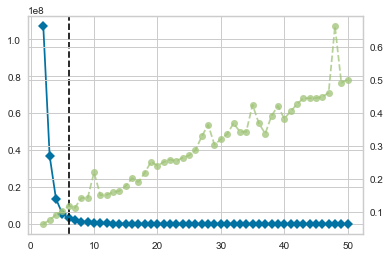

In [73]:
# ---momnet o truth---
vis(test[['centrality','date_y']]) # elbow is = 10

In [86]:
kmean = KMeans(n_clusters=10).fit(test[['centrality','date_y']])
test['kmeans'] = kmean.labels_

In [92]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=.25).fit(test[['centrality','date_y']])

test['dbscan'] = dbs.labels_
len(set(dbs.labels_))

31

In [88]:
test.head()

,centrality,date_y,kmeans,dbscan
news,0.143735,1195,3,-1
television,0.047055,100,9,-1
leagueoflegends,0.024637,695,7,-1
argentina,0.000603,29,0,-1
AskReddit,0.412695,22523,1,-1


In [93]:
test.to_csv('clustered_subreddits.csv')

In [89]:
models= {
    'kmeans': kmean,
    'dbscan': dbs,
#     'agglom': agglom,
#     'gmix': gmix
}
    
from sklearn.metrics import silhouette_score

for key in models.keys():
    score = silhouette_score(test, test[key])*100
    print(f'{key}:\t{round(score,2)}%')

kmeans:	87.28%
dbscan:	82.91%


In [ ]:
# from sklearn.manifold import TSNE

# fig, ax = plt.subplots(1,4, figsize = (15,7))
# for i, p in enumerate([5,30,50,100]):
#     tsne= TSNE(perplexity=p)
#     reduce = pd.DataFrame(tsne.fit_transform(
#         features_4d
#     ))
#     sns.scatterplot(
#         data = reduce,
#         x=0,
#         y=1,
#         hue = iris['species'],
#         ax=ax[i]
#     )
#     ax[i].set_title(f'Perplexity = {p}')
# plt.show()